# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [140]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23, 107, 248] ##V2## replace instance 439 by instance 248

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,8797,10646,14886,2471,8969,1438
2,15671,5279,2406,559,562,572


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** Instance 0 could be a large retailer selling a broad range of food and non-food articles to the end customer at large scale. ##V2## The instance's spending lies well beyond the median and even the mean spending for every single category (see below-standing overview), indicating a relatively extremely high spending over all product categories.

Instance 1 could also be a retailer, but at smaller scale, and specializing in non-food articles. ##V2## Its spending is higher in every single category than the median spending, but lies below the mean spending in categories for 'Fresh', 'Frozen', and 'Delicatessen'. Compared to other customers, we here face a moderatly high demand for each category.

Instance 2 could be a hotel, having need for paper, detergents, but also food for the own restaurant, which in this particular case probably specializes in fresh dishes. ##V2## Its spending pattern only lies above the median for 'Fresh' and 'Milk', the spending for the former category even lies above the mean, so they are in relatively high demand for freshes. 'Milk' spending on the contrary does not reach the heights of mean spending, taking into consideration the very right-skewed distribution also in this category.

In [187]:
##V2## Putting sample points' spending patterns in relation to global location statistics 
display(samples - np.round(data.mean()))
display(samples - np.round(data.median()))
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,14373.0,30627.0,14068.0,2082.0,1456.0,14998.0
1,-3203.0,4850.0,6935.0,-601.0,6088.0,-87.0
2,3671.0,-517.0,-5545.0,-2513.0,-2319.0,-953.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,17869.0,32796.0,17263.0,3628.0,3521.0,15557.0
1,293.0,7019.0,10130.0,945.0,8153.0,472.0
2,7167.0,1652.0,-2350.0,-967.0,-254.0,-394.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,26373,36423,22019,5154,4337,16523
1,8797,10646,14886,2471,8969,1438
2,15671,5279,2406,559,562,572


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [141]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import tree

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
#MW# chosen feature: 'Delicatessen'
cidx = 5
new_data = data.drop(data.columns[cidx], axis=1)
new_target = data.ix[:,cidx]

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, new_target, test_size=0.25, random_state=0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=0).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print("Coefficient of determination R^2 when predicting 'Delicatessen': %0.2f \n"% (score))

#MW# the same, but looping over all features, fitting the regressor and score it with CV
num_cv = 5
for col_idx in range(data.shape[1]):
    feature = data.columns[col_idx]
    new_data = data.drop(feature, axis=1)
    new_target = data.ix[:,col_idx]
    
    regressor_cv = tree.DecisionTreeRegressor(random_state=0)
    scores = cross_val_score(regressor, new_data, new_target, cv=num_cv)
    
    print("Coefficients of determination R^2 when predicting '{f}' and %d CV runs:".format(f=feature) % (num_cv))
    print(scores)
    print("Mean R^2: %0.2f (Std +/- %0.2f) \n" % (scores.mean(), scores.std()*2))

Coefficient of determination R^2 when predicting 'Delicatessen': -11.66 

Coefficients of determination R^2 when predicting 'Fresh' and 5 CV runs:
[-0.72149617 -1.0956071  -0.24331491 -1.01786279 -1.79894427]
Mean R^2: -0.98 (Std +/- 1.02) 

Coefficients of determination R^2 when predicting 'Milk' and 5 CV runs:
[ 0.37108903  0.33738184  0.64983096 -0.08452942 -0.21081318]
Mean R^2: 0.21 (Std +/- 0.63) 

Coefficients of determination R^2 when predicting 'Grocery' and 5 CV runs:
[ 0.79590334  0.49438273  0.641271    0.64818541  0.37165481]
Mean R^2: 0.59 (Std +/- 0.29) 

Coefficients of determination R^2 when predicting 'Frozen' and 5 CV runs:
[-12.32347049  -0.69817372  -0.87211477  -0.48602975  -0.273782  ]
Mean R^2: -2.93 (Std +/- 9.40) 

Coefficients of determination R^2 when predicting 'Detergents_Paper' and 5 CV runs:
[ 0.74313942  0.6631706   0.69275239  0.69979017  0.30093447]
Mean R^2: 0.62 (Std +/- 0.32) 

Coefficients of determination R^2 when predicting 'Delicatessen' and 5 

### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** At first, I tried tro predict the 'Delicatessen' feature. The reported prediction score R^2 is -11.66. This indicates that the feature is cannot be predicted by the remaining 5 features at all. It is necessary for identifying the customer's spending habits, since it cannot be reproduced by the remaining features, but on the contrary is a feature containing specific information. 

When looping over all features, and using 5 CV runs to determine R^2 location and spread for each feature, I see that 'Grocery' and 'Detergents_Paper' partly can be explained by at least one of the other features (<=> the mean R^2 over 5 CV runs is at around .6 for both, with a rather small spread and values greater than 0 for each CV run). Feature 'Milk' is less predictiable, but presumably has still some covariance with at least one the other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

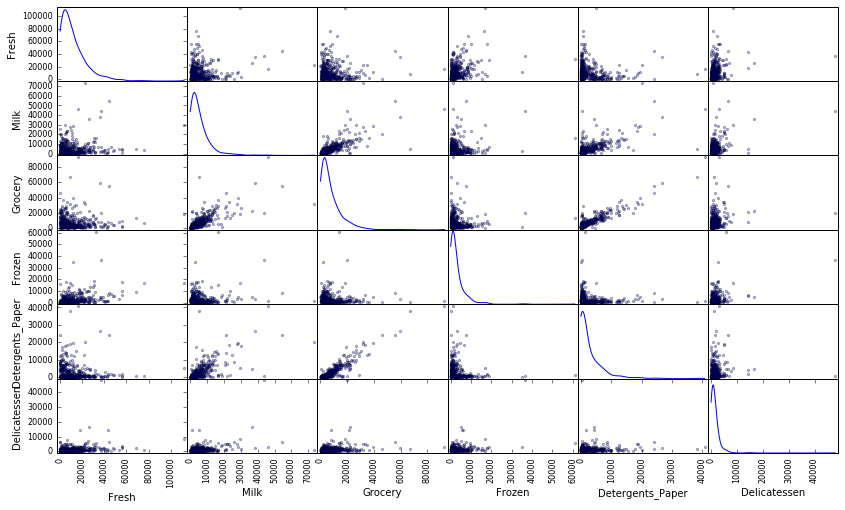

In [142]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** The plot corroborates the results of question 2. The feature trio 'Milk', 'Groceries', and 'Detergents_Paper' show some covariance: 

The more they spend on 'Milk', the more they spend on 'Grocery' (proportionally), to a lesser extent this is also true for 'Milk' and 'Detergents_Paper'.

The strongest covariance I detect between 'Grocery' and 'Detergents_Paper': The more they spend on 'Grocery', the more they spend on 'Detergents_Paper' (proportionally). 

These effects account for the observed R^2 scores in question 2: 'Grocery' and 'Detergents_Paper' correlate, 'Milk' also can partly be explained by 'Grocery' and 'Detergents_Paper'.

This leads to the conclusion that 'Fresh', 'Frozen', 'Delicatessen', and to a lesser extent 'Milk' are providing standalone information and thus can be regarded as relevant features. 'Detergents_Paper' and 'Grocery' too are very probably not irrelevant as all, they are just highly correlated (see below-standing correlation matrix for corroboration). Something to consider, according to https://sourceforge.net/p/jupiter/wiki/markdown_syntax/#md_ex_escapes: *"including the nearly-redundant variables can cause the PCA to overemphasize their contribution"*, although according to http://wiki.originlab.com/~originla/howto/index.php?title=Tutorial:Principal_Component_Analysis: *"Principal Component Analysis is an appropriate tool for removing the collinearity"*.

The data for 'Fresh' , 'Frozen', and 'Delicatessen' is not normally distributed, in fact it is not for all of the features, but we observe strongly ##V2## RIGHT-skewed distributions: most of the customers spend around 0 to 10'000 in a specific product category, with some relatively few customers spending high amounts of money. The least variation in spending is observed for 'Delicatessen', whereas in category 'Fresh' the spending pattern is distributed more broadly. 


In [143]:
print(data.corr())

                     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicatessen      0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicatessen  
Fresh                 0.244690  
Milk                  0.406368  
Grocery               0.205497  
Frozen                0.390947  
Detergents_Paper      0.069291  
Delicatessen          1.000000  


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

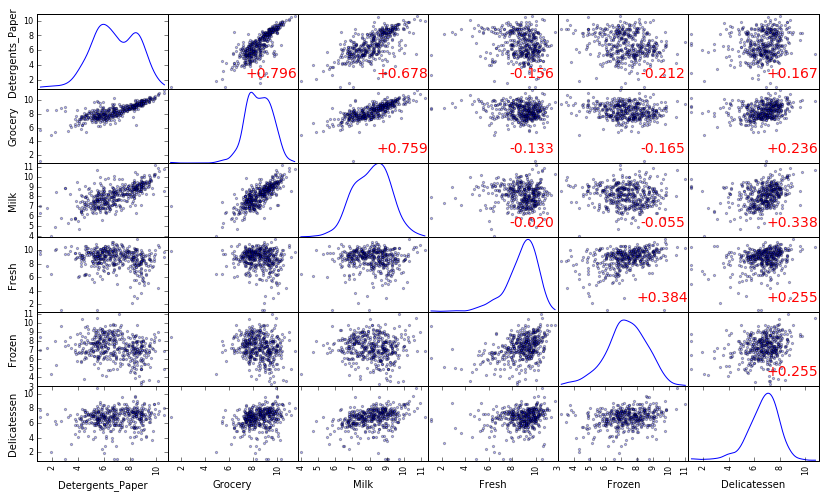

In [165]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
#pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
##V2## nice looking and bringing together information
idx_reorder = ['Detergents_Paper', 'Grocery', 'Milk', 'Fresh', 'Frozen', 'Delicatessen']
axes = pd.scatter_matrix(log_data[idx_reorder], alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = log_data[idx_reorder].corr().as_matrix()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%+.3f" %corr[i,j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center',color="red", fontsize=14)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [145]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509
1,9.082166,9.272940,9.608176,7.812378,9.101529,7.271009
2,9.659567,8.571492,7.785721,6.326149,6.331502,6.349139


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



List of all outliers:
[38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]

List of all multivariate outliers:
   instance  dimension count
0        65                2
1        66                2
2        75                2
3       128                2
4       154                3


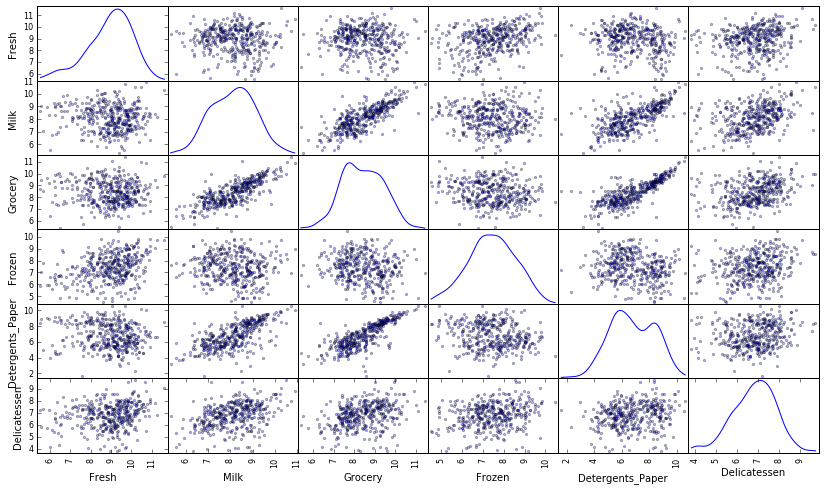

In [240]:
#MW# initialize a global outlier indices list
outlier_indices = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    feature_data = log_data[feature]
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(feature_data, q=25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(feature_data, q=75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    outlier_data = log_data[~((feature_data >= Q1 - step) & (feature_data <= Q3 + step))]
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(outlier_data)
    #MW# fill in the global outlier index list
    outlier_indices.append(outlier_data.index.values)
    
# OPTIONAL: Select the indices for data points you wish to remove
#MW# flatten outlier_indices, remove duplicate indices
outliers_flattened = sorted([idx for sublist in outlier_indices for idx in sublist])
outliers = sorted(list(set(outliers_flattened)))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

print("\nList of all outliers:")
print(outliers)

##V2## #MW# create a list with all multivariate outliers
outliers_count = [len(list(group)) for key, group in groupby(outliers_flattened)]
outliers_index_count = [i for i in enumerate(outliers_count) if lambda x: x>=2]
multivariate_outliers_indices = [t[0] for t in outliers_index_count if t[1] >=2]
multivariate_outliers_count = [t[1] for t in outliers_index_count if t[1] >=2]
mulitvariate_outliers = [outliers[i] for i in multivariate_outliers_indices]

print("\nList of all multivariate outliers:")
print(pd.concat([pd.DataFrame(mulitvariate_outliers, columns=['instance']), pd.DataFrame(multivariate_outliers_count, columns=['dimension count'])], axis=1))

pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** There are several multivariate outliers in the data set, like instances 65, 66, 154 which appear as outliers for at least two features. I cannot see a reason why NOT to remove them from the data since each multivariate outlier is influencing the distribution of every involved feature separately and thus is skewing the results: these data points should be removed from the data set altogether.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained variance ratios:
[ 0.49930484  0.22594807  0.10488309  0.09781761  0.04879109  0.0232553 ] 

The total explained variance ratio for the first two principal components is 0.725253
The total explained variance ratio for the first four principal components is 0.927954 

[[-0.09758688  0.41085006  0.45111781 -0.12804262  0.75951245  0.15785331]
 [ 0.60077834  0.1369893   0.08516261  0.62996118 -0.03761194  0.46344461]
 [ 0.74520543 -0.15440822  0.02038937 -0.26695167  0.23485013 -0.54221164]
 [-0.26670888 -0.13749532 -0.0709773   0.71328102  0.31568384 -0.54451588]
 [ 0.0114087   0.70825884  0.31682301  0.06711674 -0.47290085 -0.41197399]
 [ 0.05428877  0.51774387 -0.82668599 -0.04707807  0.20803866  0.00937317]]


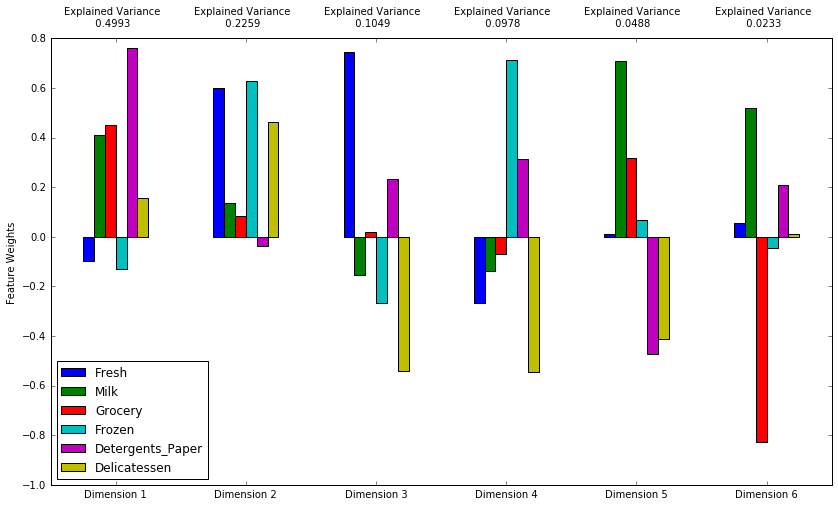

In [149]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1]).fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

print("Explained variance ratios:")
print(pca.explained_variance_ratio_,"\n")
print("The total explained variance ratio for the first two principal components is %f" % (sum(pca.explained_variance_ratio_[0:2])))
print("The total explained variance ratio for the first four principal components is %f \n" % (sum(pca.explained_variance_ratio_[0:4])))

print(pca.components_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** The total explained variance ratio for the first two principal components is 72.53%. The total explained variance ratio for the first four principal components is 92.8%. 

Generally, the feature weights are the weights to compute a component with a linear combination of the given features. E.g. the first principal component is calculated as follows: PC1 = -0.09758688xFresh+0.41085006xMilk+0.45111781xGrocery-0.12804262xFrozen+0.75951245xDetergents_Paper+0.15785331xDelicatessen

In other words, the first principal component increases heavily with an increase of spending for 'Detergents_Paper' (<=> highest feature weight/component loading <=> contributes the most to the component). It increases less with increased spending for 'Grocery' and/or 'Milk'. The other effects are positive small ('Delicatessen') or negative small ('Fresh', 'Frozen'). The axis of maximum variance is thus going along distinct spending patterns in the categories 'Detergents_Paper', 'Grocery', and 'Milk'. These are the differentiators with the most impact on the clustering.

The second principal component shows that the second most variance is to be observed along distinct spending patterns in the categories which had small impact on the first principal component: an increase in spending for 'Delicatessen' and/or 'Fresh' and/or 'Frozen' leads to an increase of the second principal component. These differentiators also play an important role in clustering then, but to a lesser extent than the above-mentioned ones (see first principal component), which here have only small impact on the component.

From here on, it gets less intuitive, since the effects of all 6 features are visible in clear hierarchy for the first two principal components: An increase in spending for 'Fresh' and/or a decrease in spending for 'Delicatessen' lets increase the third principal component. Those two features display the highest component loading here. Decreasing spending for 'Milk' and/or 'Frozen' as well as increased spending for 'Detergents_Paper' let increase the third component also, but to a lesser extent. The impact of 'Grocery' spending is relatively much smaller.

The forth component is heavily influenced by spendings for 'Frozen' (proportional), a little less by spendings for 'Delicatessen' (reciprocal). Decreasing spendings for 'Fresh' and/or increasing spending for 'Detergents_Paper' let increase the forth component also, but to a lesser extent. All other effects are smaller in scale.


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [150]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0921,3.2039,-0.9108,-1.0586,0.3270,0.2987
1,2.7779,0.7205,0.1437,0.4655,-0.0679,0.0887
2,-0.4479,-0.4432,0.8912,-0.8952,0.4545,0.7486


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [151]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [153]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0921,3.2039
1,2.7779,0.7205
2,-0.4479,-0.4432


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means clustering is faster, less memory-intensive, and easier to understand than other clustering algorithms. It scales well to large number of samples.

Gaussian Mixture Model (GMM) clustering takes into account not only variance, but also covariance. It assigns instances to a cluster based on the association strength of the data point to the cluster. As opposed to hard clustering methods, soft clustering methods are flexible in that they can assign a data point to more than one cluster.

The distribution of the reduced data (see below-standing plot) would allow for the use of GMM, which *"assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters"* (http://scikit-learn.org/stable/modules/mixture.html): I can imagine some underlying Gaussian distributions. 

On the other hand, the reduced data is circular-shaped, and we have removed the outliers - both make the reduced data eligible for K-Means clustering. I can imagine clusters of similar size, which serves the inherent assumption of K-Means.

Since this is a bit of a draw, I will implement the easier to understand algorithm K-Means, but I will challenge the optimal K-Means cluster number with the optimal GMM cluster number.

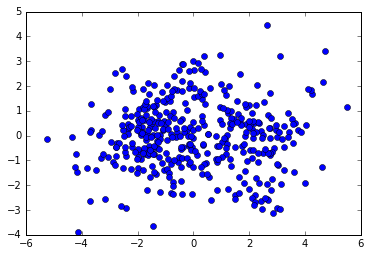

In [154]:
import matplotlib.pyplot as plt
PC = pd.DataFrame(reduced_data)
plt.plot(PC.ix[:,0], PC.ix[:,1], 'bo')

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

New best effort for KMeans at 2 with Silhouette score of 0.447158
New best effort for GMM at 2 with Silhouette score of 0.443601
Silhouette Score for KMeans with 3 clusters: 0.363986
Silhouette Score for KMeans with 4 clusters: 0.331151
Silhouette Score for KMeans with 5 clusters: 0.352412
Silhouette Score for KMeans with 6 clusters: 0.362761
Silhouette Score for KMeans with 7 clusters: 0.354716
Silhouette Score for KMeans with 8 clusters: 0.367261
Silhouette Score for KMeans with 9 clusters: 0.367312
Silhouette Score for KMeans with 10 clusters: 0.351812
Silhouette Score for KMeans with 11 clusters: 0.358248
Silhouette Score for KMeans with 12 clusters: 0.355731
Silhouette Score for KMeans with 13 clusters: 0.362248
Silhouette Score for KMeans with 14 clusters: 0.355733
Silhouette Score for KMeans with 15 clusters: 0.353634
Silhouette Score for KMeans with 16 clusters: 0.350986
Silhouette Score for KMeans with 17 clusters: 0.362955
Silhouette Score for KMeans with 18 clusters: 0.33783

'The best value is 1 and the worst value is -1. \nValues near 0 indicate overlapping clusters. \nNegative values generally indicate that a sample has been assigned to the wrong cluster, \nas a different cluster is more similar \n-- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html'

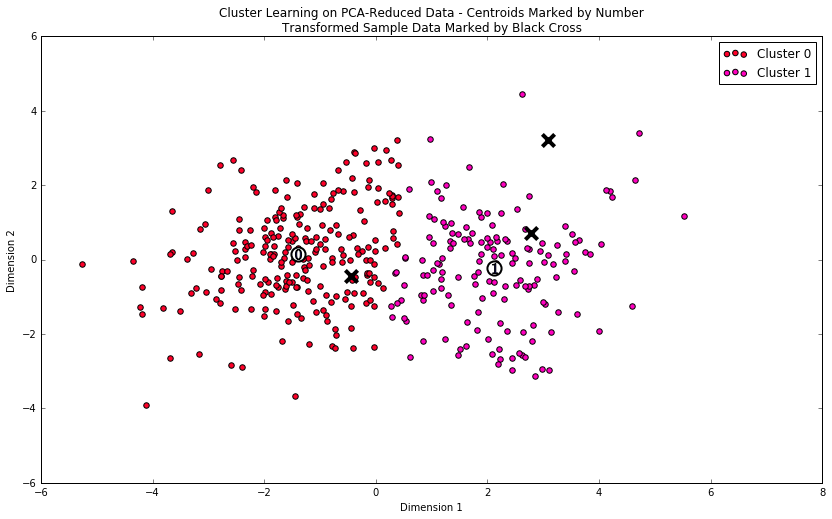

In [155]:
from sklearn.cluster import KMeans
#MW# challenging the K-Means optimal number of clusters k
from sklearn import mixture
from sklearn.metrics import silhouette_score 

max_score = max_score_challenger = 0

for k in range(2, 21):  # maximum k = reduced_data.shape[0]-1
    # TODO: Apply your clustering algorithm of choice to the reduced data
    ##V2## introducing random_state
    clusterer = KMeans(n_clusters=k, random_state=0).fit(reduced_data)
    clusterer_challenger = mixture.GMM(n_components=k, random_state=0).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    preds_challenger = clusterer_challenger.predict(reduced_data)

    # TODO: Find the cluster centers
    ##V2## reinstalling the intended center computation
    centers = clusterer.cluster_centers_ 
    #centers_challenger = clusterer_challenger.means_ 

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    score_challenger = silhouette_score(reduced_data, preds_challenger)
    
    if(score > max_score):
        max_score = score
        print("New best effort for KMeans at %i with Silhouette score of %f" % (k, score))
        rs.cluster_results(reduced_data, preds, centers, pca_samples)
        #MW# providing the best predictions and centers for the plot down the road
        preds_best, centers_best, sample_preds_best = preds, centers, sample_preds
    else:
        print("Silhouette Score for KMeans with %i clusters: %f" % (k, score))
    
    if(score_challenger > max_score_challenger):
        max_score_challenger = score_challenger
        print("New best effort for GMM at %i with Silhouette score of %f" % (k, score_challenger))

'''The best value is 1 and the worst value is -1. 
Values near 0 indicate overlapping clusters. 
Negative values generally indicate that a sample has been assigned to the wrong cluster, 
as a different cluster is more similar 
-- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html'''

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** Silhouette Score for KMeans with 2 clusters: 0.447158. Silhouette Score for KMeans with 20 clusters: 0.350379. Silhouette Score for KMeans with 100 clusters: 0.415098. Silhouette Score for KMeans with 138 clusters: 0.451756. 

2 K_Means clusters have the best Silhouette Score, if we do not take into account the increasing score as from around k=140 and upwards, which all do not seem as a meaningful number of clusters for a sample of 440 instances. GMM gives the same result of 2 optimal clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

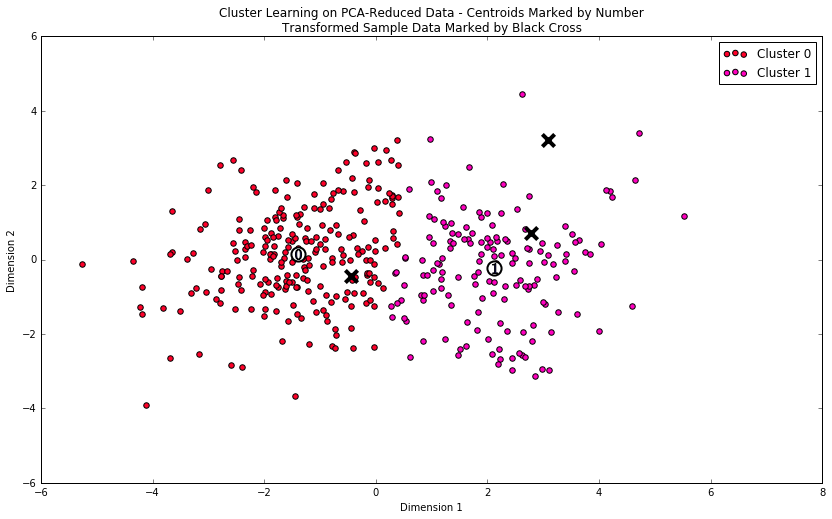

In [156]:
#MW# assigning predictions and centers to the best choices
preds, sample_preds, centers = preds_best, sample_preds_best, centers_best
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [157]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Segment 1 represents establishments with need for relatively large amounts of 'Milk', 'Grocery', 'Detergents_Paper', and 'Delicatessen', thus retailers. ##V2## For all mentioned categories, mean spending in the category lies above the respective median and the mean spending. For 'Fresh', the mean spending in Segment 1 lies massively below the global mean and even median spending, for 'Frozen', its lies somewhat below the mean and median spending. Retailers in average do spend more than the median spending for 'Delicatessen', but the mean spending does not reach mean spending here (indicating that there are very few customers with huge spendings in this category).

Segment 0 represents establishments with need for relatively large amounts of 'Fresh' and 'Frozen', thus probably restaurants and similar. ##V2## For both categories, mean spending in the category lies between median and mean global spending, indicating moderatly high spending here. For all other categories, mean spending in the category lies below global median and mean spending.

In [209]:
##V2## comparing the predicted centers with the global location statistics
display(true_centers - np.round(data.mean()))
display((true_centers - np.round(data.median())))
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2549.0,-3858.0,-5502.0,-872.0,-2574.0,-754.0
Segment 1,-6576.0,1984.0,3581.0,-1949.0,1563.0,-389.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,947.0,-1689.0,-2307.0,674.0,-509.0,-195.0
Segment 1,-3080.0,4153.0,6776.0,-403.0,3628.0,170.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [158]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:** As discussed in questions 1 and 8, instances 0 and 1 are best represented by customer segment 1, namely retailers, whereas instance 2 is best represented by customer segment 0, since it is probably a hotel with restaurant. This finding is in line with the reduced data cluster predictions in question 7, where we identify instance 0 in the upper right corner of the, instance 1 below, but clearly still belonging to the right cluster, and instance 2 in the lower left corner, belonging to the left cluster.

##V2## Sample point 0 is an extreme customer in terms of spending, as discussed in question 1: its spending lies well above the global average for every single catetory, and even exceeds the average spending of segment 1, with exception of 'Detergents_Paper'.

Sample point 1 reflects what we expect in average of segment 1 customers: its spendings for 'Grocery', 'Milk', and 'Detergents_Paper' are above the respective global averages, the spendings for the other categories lie below the averages, with the one for 'Delicatessen' close to the average.

As a customer of segment 0, sample point 2 has 
a) above average spending in 'Fresh' which well reflects the mean spending pattern in the segment
b) spendings on both 'Grocery' and 'Detergents_Paper' which lies close to the segment mean, and much below the global mean.
On the other hand, a relatively high spending for 'Milk' and a relatively low spending for 'Frozen' are not 'typical' for the segement is assigned to.



In [238]:
##V2## Comparing instances to the global location statistics
display(samples[2:3])
display(true_centers)
display(np.round(data.mean()))
display(np.round(data.median()))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,15671,5279,2406,559,562,572


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0


Fresh               12000.0
Milk                 5796.0
Grocery              7951.0
Frozen               3072.0
Detergents_Paper     2881.0
Delicatessen         1525.0
dtype: float64

Fresh               8504.0
Milk                3627.0
Grocery             4756.0
Frozen              1526.0
Detergents_Paper     816.0
Delicatessen         966.0
dtype: float64

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

**Answer:** 

a) If I was agnostic about the distribution of compaining customers at the first, unsuccessful trial
b) or if I had knowledge about it, but the distribution/share of complaints was not significantly different between the two segments, then:

I would recommend a separate A/B test for each of the identified customer segments. By doing so, we are taking advantage of the newly gained domain knowledge about customer segments, and with A/B testing, we will identify the acceptance of the new delivery service schedule vs. the old one in each segment. 

It is very likely that AT LEAST one segment will reveal significant difference in acceptance between groups A and B.

If both segments show significant differences in acceptance, the conclusion is to abandon the indended delivery service altogether. It implies also that the first test complaints originated from all across the segments, without significant difference in complains between the two segments. 

If only one segment shows significant differences in acceptance, the conclustion is to abandon the intended delivery service only for this segment, but to introduce it for the other segment.

c) If I had a priori knowledge about the distribution of compaining customers at the first, unsuccessful trial, and if this trial showed a significant concentration (share) of complaints within one of the segments, then:

I would recommend to run an A/B test only for the segment where we still are unsure about the acceptance of the new delivery service. By doing so, the company would not risk to displease customers which are already displeased after the first trial, in the other, already significantly disgruntled segment.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

**Answer:** Clearly, we have now identified two distinct segments, which as such are eligible as an input into a supervising learning problem. We thus extend the explanatory space from 6 to 7 features, the 7th feature being 'Customer Segment'

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

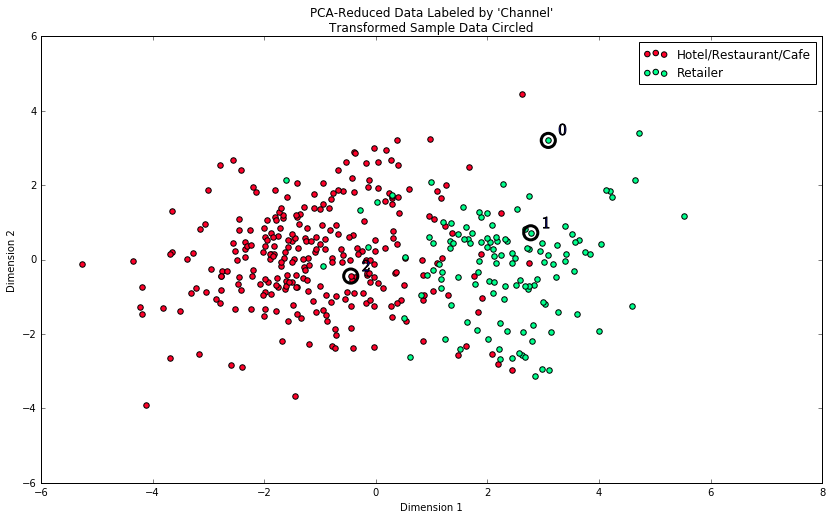

In [160]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** It turns out that we actually rebuilt the 'Channel' feature with two values, 'HoReCa' and 'Retailer'. Looking at the plots, the algorithm does predict the segments quite nicely, although 'HoReCa' displays a larger variance in the cluster than 'Retailer': Some 'HoReCa' instances have the same spending pattern as Retailers. Those dots are visible as the red ones encircled by green dots. This leads to misclassification in segment 0, especially with K-Means, which is concerned about Euclidean distance and minimizing cluster variance. I expect segment 1 to contain less misclassified channel instances, since the 'Retailer' channel seems to be a bit more homogenous.

Obviously, the number of clusters (k=2) is the correct choice.

As discussed above-stated, the majority of customers in segment 0 classify as 'HoReCa', the majority of customers in  segment 1 classify as 'Retailer', although in the latter case there are a number of 'HoReCa' instances with the the 'Retailer' spending pattern. This is clearly visible from below-standing confusion matrix.

I would consider these classifications as consistent with the previously built customer segments.

In [163]:
#MW# Confusion Matrix, as if this was supervised learning
full_data = pd.read_csv("customers.csv")
channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
predictions = pd.DataFrame(preds, columns = ['Segment'])
y_actu = pd.Series(channel['Channel'], name='Channel (true)')
y_pred = pd.Series(predictions['Segment'], name='Segment (predicted)')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Channel'], colnames=['Segment'], margins=True)

print(df_confusion)
print("\nLabels for 'Channel': 1 <=>'Hotel/Restaurant/Cafe'; 2 <=>'Retailer' ")
print("Labels for 'Segment': 0 <=> 'Hotel/Restaurant/Cafe'; 1 <=>'Retailer' ")

Segment    0    1  All
Channel               
1        234   40  274
2          6  118  124
All      240  158  398

Labels for 'Channel': 1 <=>'Hotel/Restaurant/Cafe'; 2 <=>'Retailer' 
Labels for 'Segment': 0 <=> 'Hotel/Restaurant/Cafe'; 1 <=>'Retailer' 


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.